In [2]:
import torch

In [3]:
from torch import nn

In [4]:
import torchvision.datasets as dsets

/Users/nancyliu/anaconda3/envs/finance/lib/python3.6/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: dlopen(/Users/nancyliu/anaconda3/envs/finance/lib/python3.6/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /Users/nancyliu/anaconda3/envs/finance/lib/python3.6/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 14.0.0 or later, but libjpeg.9.dylib provides version 12.0.0
  warn(f"Failed to load image Python extension: {e}")


In [5]:
import torchvision.transforms as transforms

In [6]:
DOWNLOAD_MNIST = True
train_data = dsets.MNIST(root='./mnist', train=True, transform=transforms.ToTensor(), download=DOWNLOAD_MNIST)

In [7]:
print(train_data.train_data.size())

torch.Size([60000, 28, 28])


/Users/nancyliu/anaconda3/envs/finance/lib/python3.6/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [11]:
train_data.train_data[0][0]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)

/Users/nancyliu/anaconda3/envs/finance/lib/python3.6/site-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


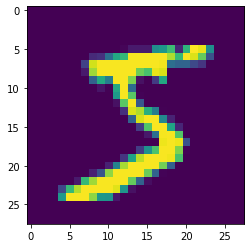

In [12]:
import matplotlib.pyplot as plt
plt.imshow(train_data.train_data[0])

In [ ]:
EPOCH = 1
PATCH_SIZE = 1


In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=tr)

In [14]:
test_data = dsets.MNIST(root='./mnist', train=False, transform=transforms.ToTensor())
test_data.test_data[0][0]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)

In [26]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./mnist
    Split: Train
    StandardTransform
Transform: ToTensor()

In [16]:
train_data.test_data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [20]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

In [29]:
x

tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416])

In [30]:
y

tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1430e-03, -8.7423e-08])

In [18]:
import numpy as np
# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

-0.32160126537828565

In [22]:

y_pred = a + b * x + c * x ** 2 + d * x ** 3
loss = np.square(y_pred - y).sum()
loss

tensor(102938.2188)

In [23]:
grad_y_pred = 2.0 * (y_pred - y)
grad_a = grad_y_pred.sum()
grad_b = (grad_y_pred * x).sum()
grad_c = (grad_y_pred * x ** 2).sum()
grad_d = (grad_y_pred * x ** 3).sum()

In [24]:
grad_y_pred, grad_a

(tensor([-41.1396, -41.0250, -40.9106,  ...,  33.2664,  33.3680,  33.4698]),
 tensor(-3416.3284))

In [26]:
learning_rate = 1e-6
a -= learning_rate * grad_a
a

tensor(-0.3182)

In [27]:
b -= learning_rate * grad_b
c -= learning_rate * grad_c
d -= learning_rate * grad_d

In [28]:
y_pred = a + b * x + c * x ** 2 + d * x ** 3
loss = np.square(y_pred - y).sum()
loss

tensor(21024.6035)

In [35]:
import torch
import math


dtype = torch.float
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(3000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 200 == 99:
        print(t, loss)
        print(type(a))

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 444.033447265625
<class 'torch.Tensor'>
299 199.24411010742188
<class 'torch.Tensor'>
499 92.14584350585938
<class 'torch.Tensor'>
699 45.285003662109375
<class 'torch.Tensor'>
899 24.778928756713867
<class 'torch.Tensor'>
1099 15.804624557495117
<class 'torch.Tensor'>
1299 11.876496315002441
<class 'torch.Tensor'>
1499 10.156875610351562
<class 'torch.Tensor'>
1699 9.403968811035156
<class 'torch.Tensor'>
1899 9.074254989624023
<class 'torch.Tensor'>
2099 8.929834365844727
<class 'torch.Tensor'>
2299 8.866559982299805
<class 'torch.Tensor'>
2499 8.838827133178711
<class 'torch.Tensor'>
2699 8.82667064666748
<class 'torch.Tensor'>
2899 8.821338653564453
<class 'torch.Tensor'>
Result: y = 0.00031567172845825553 + 0.8551506996154785 x + -5.445871647680178e-05 x^2 + -0.09310420602560043 x^3


In [38]:
print(a.grad)

None


In [40]:
# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), dtype=dtype, requires_grad=True)
b = torch.randn((), dtype=dtype, requires_grad=True)
c = torch.randn((), dtype=dtype, requires_grad=True)
d = torch.randn((), dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y using operations on Tensors.
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [41]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

In [42]:
y

tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1432e-03, -8.7423e-08])

In [60]:
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)
a

tensor(0.3984, requires_grad=True)

In [63]:
class LegendrePolynomial3(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        return grad_output * 1.5 * (5 * input ** 2 - 1)


dtype = torch.float
device = torch.device("cpu")

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For this example, we need
# 4 weights: y = a + b * P3(c + d * x), these weights need to be initialized
# not too far from the correct result to ensure convergence.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

learning_rate = 5e-6
for t in range(2000):
    # To apply our Function, we use Function.apply method. We alias this as 'P3'.
    P3 = LegendrePolynomial3.apply

    # Forward pass: compute predicted y using operations; we compute
    # P3 using our custom autograd operation.
    y_pred = a + b * P3(c + d * x)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} * P3({c.item()} + {d.item()} x)')

99 209.95834350585938
199 144.66018676757812
299 100.70249938964844
399 71.03519439697266
499 50.97850799560547
599 37.403133392333984
699 28.206867218017578
799 21.97318458557129
899 17.7457275390625
999 14.877889633178711
1099 12.93176555633545
1199 11.610918045043945
1299 10.714258193969727
1399 10.10548210144043
1499 9.692106246948242
1599 9.411375999450684
1699 9.220744132995605
1799 9.091285705566406
1899 9.003361701965332
1999 8.943639755249023
Result: y = -7.290119619085544e-09 + -2.208526849746704 * P3(1.3728043146699065e-09 + 0.2554861009120941 x)


In [70]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# In the above code, x.unsqueeze(-1) has shape (2000, 1), and p has shape
# (3,), for this case, broadcasting semantics will apply to obtain a tensor
# of shape (2000, 3) 

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

99 907.3910522460938
199 614.1749267578125
299 417.0187683105469
399 284.3370056152344
499 194.96511840820312
599 134.71029663085938
699 94.0472412109375
799 66.57903289794922
899 48.00537872314453
999 35.43321228027344
1099 26.91440200805664
1199 21.135913848876953
1299 17.211971282958984
1399 14.544511795043945
1499 12.729094505310059
1599 11.492193222045898
1699 10.648486137390137
1799 10.072332382202148
1899 9.678426742553711
1999 9.408811569213867
Result: y = -0.01944676786661148 + 0.8412450551986694 x + 0.0033548902720212936 x^2 + -0.09112624824047089 x^3


In [71]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.8412,  0.0034, -0.0911]], requires_grad=True)
Parameter containing:
tensor([-0.0194], requires_grad=True)


In [80]:
model[0].weight

Parameter containing:
tensor([[ 0.8412,  0.0034, -0.0911]], requires_grad=True)

In [102]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3, x^4).
p = torch.tensor([1, 2, 3, 4])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(4, 1),
    torch.nn.Flatten(0, 1)
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
for t in range(5999):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()


linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3 + {linear_layer.weight[:, 3].item()} x^4')

99 1250.697021484375
199 533.869873046875
299 426.7494812011719
399 336.6270751953125
499 251.68777465820312
599 177.1588592529297
699 115.68023681640625
799 68.90253448486328
899 37.5605354309082
999 19.611331939697266
1099 14.564725875854492
1199 11.44404411315918
1299 9.808426856994629
1399 9.497931480407715
1499 9.542431831359863
1599 9.671093940734863
1699 9.639744758605957
1799 9.563681602478027
1899 9.600128173828125
1999 9.623003959655762
2099 9.609539031982422
2199 9.601235389709473
2299 9.606821060180664
2399 9.609519958496094
2499 9.607364654541016
2599 9.606498718261719
2699 9.607316970825195
2799 9.607568740844727
2899 9.607278823852539
2999 9.607185363769531
3099 9.607283592224121
3199 9.607346534729004
3299 9.607307434082031
3399 9.607288360595703
3499 9.607271194458008
3599 9.607277870178223
3699 9.60732650756836
3799 9.607303619384766
3899 9.607255935668945
3999 9.607291221618652
4099 9.607324600219727
4199 9.60728645324707
4299 9.607251167297363
4399 9.607303619384766

In [82]:
optimizer

RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    eps: 1e-08
    lr: 0.001
    momentum: 0
    weight_decay: 0
)

In [93]:
loss.item()

8.92068099975586

In [103]:
class Polynomial3(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3

    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} x + {self.c.item()} x^2 + {self.d.item()} x^3'

x    

tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416])

In [104]:
# Construct our model by instantiating the class defined above
model = Polynomial3()

Polynomial3()

In [112]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)
for t in range(600):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print(f'Result: {model.string()}')

99 630.37158203125
199 420.26715087890625
299 281.204833984375
399 189.157470703125
499 128.2257080078125
599 87.88810729980469
Result: y = 0.04375305399298668 + 0.5863640308380127 x + -0.007548127789050341 x^2 + -0.05487164482474327 x^3


In [117]:
import random
class DynamicNet(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate five parameters and assign them as members.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))
        self.e = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 4, 5
        and reuse the e parameter to compute the contribution of these orders.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same parameter many
        times when defining a computational graph.
        """
        y = self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3
        for exp in range(4, random.randint(4, 6)):
            y = y + self.e * x ** exp
            print(exp)
        return y

x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)    
    # Construct our model by instantiating the class defined above
model = DynamicNet()

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-8, momentum=0.9)
for t in range(30000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    if t % 2000 == 1999:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')    

4
5
4
5
4
4
4
5
4
5
4
5
4
4
5
4
4
4
5
4
5
4
5
4
5
4
5
4
4
5
4
4
5
4
5
4
4
4
4
4
5
4
4
5
4
4
5
4
5
4
4
5
4
4
4
5
4
4
4
4
4
4
4
5
4
4
5
4
4
4
5
4
5
4
5
4
5
4
5
4
4
5
4
4
4
4
4
4
5
4
4
4
4
5
4
5
4
5
4
4
4
5
4
4
4
5
4
5
4
4
4
4
5
4
5
4
5
4
5
4
4
5
4
5
4
5
4
4
5
4
5
4
4
5
4
5
4
5
4
4
5
4
5
4
4
4
5
4
4
5
4
5
4
5
4
4
4
5
4
4
5
4
4
5
4
5
4
4
5
4
4
5
4
4
4
5
4
5
4
5
4
4
5
4
4
4
5
4
4
4
5
4
4
5
4
4
5
4
4
4
5
4
4
4
5
4
5
4
5
4
5
4
5
4
5
4
4
5
4
5
4
4
5
4
4
5
4
5
4
4
5
4
4
4
4
4
4
4
4
5
4
5
4
5
4
4
4
4
4
4
5
4
5
4
4
4
4
4
4
5
4
5
4
4
5
4
5
4
5
4
4
5
4
5
4
5
4
4
4
5
4
5
4
5
4
4
4
5
4
4
5
4
5
4
5
4
4
4
5
4
4
4
5
4
5
4
5
4
5
4
4
5
4
4
4
4
5
4
5
4
4
5
4
5
4
4
5
4
4
5
4
4
5
4
4
5
4
4
4
4
5
4
4
4
5
4
4
4
4
5
4
5
4
4
4
4
5
4
5
4
4
5
4
5
4
5
4
4
4
5
4
5
4
4
4
4
5
4
4
5
4
4
4
4
4
4
5
4
5
4
4
4
5
4
4
4
5
4
4
4
4
4
5
4
4
4
5
4
5
4
5
4
4
4
4
4
5
4
5
4
5
4
4
5
4
4
5
4
4
4
5
4
4
4
5
4
5
4
4
5
4
5
4
5
4
4
5
4
5
4
5
4
5
4
4
4
5
4
4
5
4
4
5
4
5
4
4
5
4
4
4
4
4
4
5
4
5
4
5
4
4
4
5
4
4
5
4
5
4
5
4
4
5
4
4
5
4
4
5
4


4
4
5
4
5
4
4
4
4
5
4
4
4
4
4
5
4
5
4
5
4
4
5
4
4
4
4
4
5
4
5
4
5
4
4
5
4
4
5
4
4
4
4
5
4
4
5
4
5
4
5
4
4
4
4
5
4
4
4
5
4
5
4
4
5
4
5
4
5
4
4
5
4
5
4
4
5
4
5
4
5
4
4
5
4
5
4
4
4
5
4
4
4
4
5
4
5
4
4
4
5
4
4
5
4
4
5
4
5
4
4
4
4
5
4
4
4
5
4
5
4
5
4
4
5
4
5
4
4
5
4
4
5
4
4
5
4
4
5
4
5
4
5
4
4
5
4
4
4
4
4
4
5
4
4
4
5
4
4
5
4
4
5
4
5
4
4
4
5
4
4
5
4
4
4
4
4
5
4
5
4
5
4
4
5
4
4
5
4
4
5
4
5
4
5
4
4
4
5
4
5
4
4
5
4
5
4
5
4
5
4
5
4
5
4
4
5
4
5
4
5
4
5
4
4
5
4
5
4
5
4
5
4
5
4
5
4
4
4
5
4
4
5
4
4
5
4
4
5
4
4
5
4
5
4
4
4
5
4
5
4
4
4
5
4
5
4
5
4
5
4
5
4
5
4
5
4
5
4
4
5
4
5
4
5
4
5
4
4
5
4
4
4
4
5
4
5
4
5
4
5
4
5
4
4
4
4
5
4
5
4
5
4
5
4
4
5
4
4
4
5
4
5
4
5
4
4
5
4
4
4
4
5
4
5
4
5
4
5
4
4
4
4
5
4
4
5
4
4
5
4
4
5
4
5
4
4
4
4
4
4
4
5
4
4
4
4
4
5
4
4
5
4
4
4
5
4
5
4
4
4
4
5
4
4
5
4
4
5
4
4
5
4
5
4
5
4
5
4
4
4
4
5
4
4
4
4
5
4
4
4
4
5
4
5
4
5
4
4
4
5
4
4
5
4
5
4
4
5
4
4
4
5
4
4
5
4
5
4
4
4
4
4
4
4
4
5
4
5
4
4
4
4
5
4
5
4
5
4
5
4
4
4
5
4
4
5
4
4
5
4
4
4
5
4
5
4
4
4
4
4
5
4
5
4
4
5
4
4
5
4
5
4
4
5
4
5
4
4
5


4
4
5
4
5
4
5
4
5
4
5
4
4
5
4
5
4
5
4
4
4
4
5
4
4
4
5
4
5
4
5
4
5
4
5
4
5
4
4
5
4
4
5
4
5
4
4
4
5
4
4
5
4
4
5
4
4
4
4
4
4
4
4
5
4
5
4
4
4
4
5
4
5
4
5
4
5
4
5
4
5
4
5
4
4
4
4
5
4
5
4
4
5
4
4
4
5
4
5
4
5
4
4
5
4
5
4
4
5
4
4
4
4
5
4
4
4
4
5
4
4
4
5
4
4
4
5
4
4
5
4
4
5
4
5
4
5
4
4
4
5
4
4
5
4
4
5
4
4
5
4
5
4
4
4
5
4
5
4
5
4
5
4
5
4
4
4
5
4
5
4
5
4
5
4
5
4
4
4
5
4
4
4
5
4
4
4
5
4
4
4
5
4
5
4
4
5
4
5
4
4
5
4
5
4
4
4
5
4
4
4
5
4
4
5
4
4
5
4
4
4
5
4
5
4
5
4
5
4
4
4
4
5
4
5
4
5
4
5
4
5
4
5
4
5
4
5
4
5
4
4
5
4
5
4
4
4
4
4
4
5
4
4
5
4
4
5
4
4
5
4
5
4
4
5
4
4
5
4
5
4
5
4
4
5
4
4
4
4
5
4
4
4
5
4
5
4
4
5
4
4
4
4
4
4
5
4
5
4
4
5
4
5
4
5
4
5
4
5
4
5
4
5
4
5
4
5
4
4
4
5
4
5
4
5
4
4
4
4
4
5
4
4
4
5
4
4
5
4
4
4
5
4
5
4
4
4
4
5
4
5
4
5
4
5
4
4
4
4
5
4
4
5
4
4
4
5
4
5
4
4
4
4
5
4
5
4
4
4
5
4
5
4
5
4
4
4
4
4
5
4
4
4
5
4
4
4
4
4
5
4
5
4
4
4
4
4
4
5
4
5
4
4
4
4
5
4
4
4
4
5
4
4
4
5
4
5
4
5
4
5
4
4
4
4
4
5
4
4
4
4
4
4
5
4
4
5
4
4
5
4
4
4
5
4
4
5
4
4
4
4
5
4
5
4
5
4
4
4
4
4
5
4
4
4
4
5
4
4
4
4
4
5
4
4
5
4
4
4
5


4
4
4
5
4
5
4
4
4
4
4
5
4
5
4
5
4
5
4
4
4
4
5
4
5
4
5
4
4
4
4
5
4
4
5
4
5
4
4
5
4
4
4
5
4
5
4
4
4
4
4
4
5
4
4
4
4
4
4
4
4
4
4
4
4
5
4
4
5
4
5
4
4
4
5
4
4
5
4
4
5
4
4
5
4
5
4
4
4
4
5
4
4
5
4
5
4
5
4
4
4
4
5
4
4
4
4
4
4
5
4
5
4
4
5
4
5
4
4
4
4
5
4
5
4
4
4
5
4
4
4
4
4
5
4
4
5
4
5
4
5
4
5
4
5
4
5
4
5
4
5
4
4
4
5
4
5
4
5
4
5
4
5
4
5
4
4
5
4
5
4
5
4
5
4
4
5
4
4
4
5
4
5
4
4
4
4
5
4
5
4
4
4
4
5
4
4
5
4
5
4
4
4
4
5
4
4
4
4
5
4
4
4
4
4
4
4
4
4
4
4
5
4
5
4
4
5
4
4
4
4
4
4
5
4
4
4
5
4
4
4
4
5
4
4
4
5
4
5
4
5
4
5
4
4
4
4
5
4
5
4
5
4
4
4
5
4
5
4
5
4
5
4
5
4
5
4
4
4
5
4
4
5
4
4
4
4
5
4
5
4
4
5
4
5
4
5
4
5
4
5
4
4
5
4
5
4
5
4
5
4
4
5
4
5
4
5
4
5
4
4
4
5
4
5
4
4
5
4
4
4
4
4
5
4
4
4
5
4
4
5
4
4
4
5
4
4
5
4
5
4
5
4
5
4
4
4
4
4
5
4
5
4
4
5
4
5
4
5
4
5
4
4
5
4
5
4
5
4
4
4
5
4
4
5
4
4
5
4
5
4
5
4
4
4
5
4
5
4
4
5
4
4
5
4
5
4
4
4
4
4
4
5
4
5
4
4
5
4
5
4
4
4
5
4
4
4
4
5
4
4
4
4
4
5
4
4
4
5
4
4
4
4
5
4
5
4
5
4
4
4
4
5
4
5
4
4
5
4
4
4
4
4
5
4
5
4
5
4
5
4
4
5
4
5
4
5
4
5
4
4
5
4
4
4
4
4
5
4
4
5
4
4
4
4
5
4
4
5
4


5
4
5
4
5
4
4
4
4
5
4
4
4
5
4
5
4
5
4
4
4
5
4
4
5
4
5
4
5
4
4
4
5
4
4
4
5
4
5
4
5
4
4
5
4
4
4
5
4
4
5
4
5
4
5
4
5
4
5
4
5
4
5
4
4
4
4
4
4
5
4
5
4
5
4
4
4
5
4
4
5
4
5
4
5
4
5
4
4
4
4
4
4
4
5
4
5
4
4
5
4
4
4
5
4
4
5
4
4
5
4
4
5
4
5
4
5
4
4
4
4
4
4
4
5
4
5
4
5
4
5
4
4
5
4
4
5
4
4
5
4
5
4
4
5
4
4
4
5
4
5
4
4
5
4
5
4
5
4
4
5
4
4
4
4
5
4
5
4
5
4
5
4
4
4
4
5
4
4
4
5
4
5
4
5
4
4
4
5
4
4
4
5
4
4
4
5
4
4
5
4
4
5
4
4
4
4
5
4
5
4
5
4
5
4
5
4
4
4
4
5
4
4
5
4
5
4
5
4
4
4
5
4
5
4
4
4
4
4
4
5
4
5
4
5
4
4
4
4
5
4
4
5
4
5
4
5
4
5
4
4
5
4
5
4
5
4
5
4
4
5
4
4
4
4
4
4
5
4
4
4
5
4
5
4
4
4
4
5
4
5
4
4
5
4
5
4
5
4
4
5
4
4
4
4
4
4
5
4
5
4
4
4
4
4
4
5
4
5
4
5
4
5
4
4
4
4
5
4
5
4
5
4
4
5
4
5
4
5
4
4
5
4
5
4
5
4
5
4
5
4
4
5
4
5
4
4
4
5
4
5
4
4
5
4
4
4
5
4
4
4
5
4
5
4
5
4
4
4
5
4
4
5
4
4
4
5
4
5
4
4
4
4
5
4
4
5
4
5
4
4
4
4
4
4
5
4
5
4
5
4
5
4
5
4
5
4
4
4
4
5
4
4
5
4
5
4
5
4
4
4
5
4
5
4
17999 9.280261993408203
4
4
4
4
4
4
5
4
5
4
5
4
5
4
4
4
5
4
4
5
4
5
4
5
4
4
4
5
4
4
5
4
5
4
5
4
4
5
4
4
4
4
5
4
4
4
4
5
4
4
5
4
5


4
5
4
4
4
5
4
5
4
4
5
4
4
5
4
5
4
5
4
5
4
5
4
4
5
4
4
5
4
5
4
4
5
4
5
4
5
4
4
4
5
4
4
4
4
4
4
5
4
5
4
5
4
4
4
5
4
4
5
4
4
5
4
5
4
4
4
5
4
5
4
5
4
5
4
4
4
4
4
5
4
4
5
4
5
4
5
4
5
4
4
4
5
4
4
4
4
5
4
4
5
4
4
5
4
21999 8.959875106811523
4
4
5
4
4
5
4
5
4
4
4
5
4
4
5
4
4
4
5
4
4
4
4
4
4
4
5
4
5
4
4
5
4
4
4
5
4
4
5
4
5
4
4
4
5
4
4
5
4
5
4
5
4
4
4
4
5
4
4
4
5
4
4
5
4
4
4
4
4
4
5
4
4
5
4
4
4
5
4
5
4
4
5
4
5
4
5
4
4
5
4
4
4
5
4
4
4
5
4
5
4
5
4
5
4
4
5
4
5
4
4
4
5
4
5
4
5
4
5
4
4
5
4
4
4
5
4
4
4
4
4
4
5
4
4
4
5
4
5
4
5
4
5
4
5
4
5
4
5
4
4
4
5
4
4
4
4
4
4
4
5
4
5
4
5
4
5
4
4
4
5
4
5
4
4
4
4
4
4
4
4
5
4
4
5
4
4
5
4
4
5
4
4
4
4
5
4
4
4
4
4
5
4
5
4
4
5
4
4
4
4
5
4
5
4
5
4
4
4
4
4
5
4
5
4
5
4
4
5
4
5
4
4
5
4
4
4
5
4
4
4
4
4
5
4
5
4
5
4
5
4
4
5
4
5
4
5
4
5
4
5
4
5
4
4
5
4
4
4
5
4
4
4
4
5
4
4
5
4
5
4
4
4
4
4
5
4
5
4
5
4
5
4
5
4
5
4
4
5
4
4
5
4
4
5
4
4
4
4
4
4
5
4
4
5
4
5
4
5
4
4
5
4
4
4
4
5
4
5
4
5
4
4
5
4
4
5
4
5
4
5
4
5
4
4
4
5
4
5
4
5
4
4
5
4
5
4
5
4
5
4
4
5
4
5
4
5
4
4
5
4
5
4
4
5
4
5
4
4
5
4
5
4


4
5
4
4
4
5
4
4
5
4
4
5
4
4
4
4
5
4
4
4
5
4
4
5
4
4
5
4
4
5
4
4
4
4
4
5
4
4
5
4
5
4
5
4
5
4
4
4
4
5
4
5
4
5
4
4
5
4
5
4
4
4
5
4
5
4
4
5
4
5
4
4
4
4
5
4
4
4
5
4
4
4
5
4
4
4
4
4
5
4
5
4
5
4
5
4
4
4
5
4
5
4
4
5
4
5
4
5
4
5
4
5
4
5
4
4
4
4
4
5
4
5
4
5
4
5
4
4
5
4
4
4
5
4
5
4
4
5
4
5
4
5
4
4
5
4
5
4
4
5
4
4
5
4
4
4
5
4
4
5
4
4
4
4
4
4
5
4
5
4
5
4
5
4
4
4
4
5
4
5
4
4
5
4
5
4
4
5
4
4
4
4
5
4
4
4
5
4
5
4
5
4
5
4
5
4
4
4
5
4
5
4
5
4
5
4
4
5
4
5
4
5
4
5
4
5
4
4
5
4
5
4
4
4
4
5
4
4
4
4
5
4
4
5
4
4
5
4
5
4
4
5
4
5
4
4
5
4
5
4
5
4
4
4
4
4
4
4
4
4
4
5
4
4
5
4
4
5
4
4
5
4
4
4
5
4
4
4
4
4
5
4
4
4
4
4
5
4
4
4
5
4
4
4
5
4
4
5
4
4
5
4
4
4
5
4
5
4
4
4
4
5
4
5
4
4
4
5
4
4
5
4
4
5
4
5
4
4
4
4
5
4
4
4
4
4
4
4
4
5
4
5
4
5
4
4
5
4
5
4
4
5
4
4
4
4
4
4
4
5
4
4
4
4
4
4
5
4
5
4
4
5
4
5
4
4
5
4
5
4
5
4
5
4
4
5
4
5
4
4
4
5
4
4
4
4
4
5
4
4
4
4
5
4
5
4
5
4
5
4
5
4
4
4
4
5
4
5
4
4
5
4
4
4
5
4
4
4
4
4
5
4
5
4
5
4
5
4
5
4
5
4
5
4
5
4
4
4
5
4
4
5
4
4
5
4
5
4
4
5
4
5
4
5
4
5
4
4
4
4
4
4
4
5
4
4
5
4
4
4
4
4
4
4
4
5
4
4
4
4


AttributeError: 'DynamicNet' object has no attribute 'string'